In [1]:
import torch 
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed, IntSlider, FloatSlider

from lab2 import grad, GD, momentum, Nesterov, plot_3D, plot_3D_GD, plot_2D_GD_interactive, err

## Esempio 3

In [2]:
def h(x,y):
    return (1-x)**2+100*(y-x**2)**2

x = torch.linspace(-1.5,1.5,100).requires_grad_(True)
y = torch.linspace(-1,3,100).requires_grad_(True)

plot_3D(x,y,h)

### GD

In [3]:
x_0, y_0 = -1, -0.5
learning_rate = 0.002
num_epochs = 40

gd = GD(x_0,y_0,learning_rate,num_epochs,h)
plot_3D = plot_3D_GD(x,y,gd[:,0],gd[:,1],h)
# plot_3D.update_layout(
#     scene=dict(
#         zaxis=dict(
#             type='log',
#             title='log(f(x, y))'
#         )
#     )
# )
plot_3D.show()

In [4]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('gd'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(1), 
             y_min = fixed(1), 
             fun = fixed(h), 
             x_0 = FloatSlider(min=-1.5, max=1.5, step=0.1, value=-1),
             y_0 = FloatSlider(min=-1, max=3, step=0.1, value=-0.5),
             eta = FloatSlider(min = 0, max = 0.004, step = 0.0005, value=0.002, readout_format='.4f'), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

interactive(children=(FloatSlider(value=-1.0, description='x_0', max=1.5, min=-1.5), FloatSlider(value=-0.5, d…

### Momentum


In [5]:
V = torch.zeros(2)
learning_rate = 0.002
num_epochs = 10
beta = 0.5

mom = momentum(x_0,y_0,V,beta,learning_rate,num_epochs,h)

fig_3D = plot_3D_GD(x,y,mom[:,0],mom[:,1],h)
fig_3D.show()

In [6]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('momentum'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(1), 
             y_min = fixed(1), 
             fun = fixed(h), 
             x_0 = FloatSlider(min=-1.5, max=1.5, step=0.1, value=-1),
             y_0 = FloatSlider(min=-1, max=3, step=0.1, value=-0.5),
             eta = FloatSlider(min = 0, max = 0.004, step = 0.0005, value=0.002, readout_format='.4f'), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

interactive(children=(FloatSlider(value=-1.0, description='x_0', max=1.5, min=-1.5), FloatSlider(value=-0.5, d…

### Nesterov

In [7]:
beta = 0.49
nes = Nesterov(x_0,y_0,V,beta,learning_rate,num_epochs,h)

fig_3D = plot_3D_GD(x,y,nes[:,0],nes[:,1],h)
fig_3D.show()

In [8]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('nesterov'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(1), 
             y_min = fixed(1), 
             fun = fixed(h), 
             x_0 = FloatSlider(min=-1.5, max=1.5, step=0.1, value=-1),
             y_0 = FloatSlider(min=-1, max=3, step=0.1, value=-0.5),
             eta = FloatSlider(min = 0, max = 0.004, step = 0.0005, value=0.002, readout_format='.4f'), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

interactive(children=(FloatSlider(value=-1.0, description='x_0', max=1.5, min=-1.5), FloatSlider(value=-0.5, d…

ValueError: x and y must have same first dimension, but have shapes (10,) and torch.Size([40])

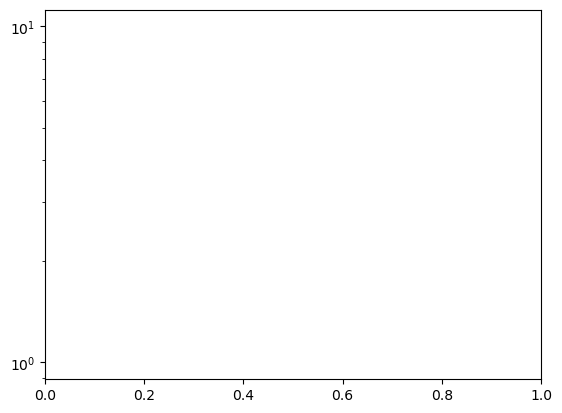

In [9]:
min_glob = torch.Tensor([1,1])
dist_err_gd = err(gd,min_glob,h)
dist_err_mom = err(mom,min_glob,h)
dist_err_nes = err(nes,min_glob,h)
N = range(num_epochs)
plt.semilogy(N,dist_err_gd, marker = 'o', label = 'GD')
plt.semilogy(N,dist_err_mom,marker = 'x', label = 'Momentum')
plt.semilogy(N,dist_err_nes,marker = 'd', label = 'Nesterov')

plt.grid()
plt.xlabel('Epochs')
plt.title('Distance from the global min')
plt.legend()
plt.show()